# <center>Detecção do Câncer de Mama </center>

##### Uma ferramenta muito poderosa e que está sendo amplamente utilizda para detecção de cancer de mama, que aflinge várias mulheres até os 90 anos segundo a [Sociedade Brasileira de Mastologia](https://noticias.r7.com/saude/uma-em-cada-12-mulheres-recebera-diagnostico-de-cancer-de-mama-02102019), é o *Machine Learning*, contribuindo assim com diagnósticos mais rápidos e precisos.
##### Uma das principais características do câncer de mama é que quanto mais precoce for o seu diagnóstico, maiores são as chances de tratamento. 
##### O seguinte arquivo apresenta um projeto de *Data Science* com um modelo de *Machine Learning* para a deteção do câncer de mama.

## Importar os Dados

##### Para a construção do modelo de *Machine Learning* foi usado o banco de dados Wisconsin, disponibilizado no [Repositório de Machine Learning da UCI](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)).
##### Nos dados que estão contidos num arquivo .csv, possuem 569 entradas e 32 colunas onde as observações foram obtidas por meio da aspiração com agulha fina de células da mama. Sendo o desfecho a característica do tumor como benigna ou maligna.

In [1]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# configurar o notebook
sns.set_style()

In [7]:
# importar o dataset em csv 
data_path = "breast-cancer-wisconsin.csv" 
df = pd.read_csv(data_path)
df.head() #apresentando as primeiras linhas dos dados

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


##### Primeiramente foi possível identificar que aultima coluna aparentemente é uma coluna com erro, assim iremos elimina-la

In [8]:
# eliminar uma coluna com erro
df.drop('Unnamed: 32', axis=1, inplace=True)

## Análise Exploratória

##### A primeira coisa que faremos após importar o dataset será examinar as dimensões do DataFrame e as primeiras entradas.

* A coluna `id` representa o número de identificação.
* A coluna `diagnosis` é a variável alvo.
  * **M -** *Maligno*
  * **B -** *Benigno*
* A descrição completa para cada uma das *features* está disponível [neste link](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).


##### Uma característica é um número de identificação (ID), outro é o diagnóstico de câncer, e 30 são medidas laboratoriais numéricas. O diagnóstico é codificado como “M” para indicar maligno ou “B” para indicar benigno.
##### Outra operação que podemos fazer seria eliminar a coluna de ID, pois ela não tara informação util para a construção do modelo.

In [9]:
# eliminar uma coluna ID
df.drop('id', axis=1, inplace=True)

In [10]:
# dimensões do df
print("DIMENSÕES DO DATAFRAME:")
print("Linhas:\t\t{}".format(df.shape[0]))
print("Colunas:\t{}".format(df.shape[1]))

DIMENSÕES DO DATAFRAME:
Linhas:		569
Colunas:	31


##### Observando o resumo estatístico das variáveis numéricas.

In [11]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


##### Com exceção da coluna `diagnosis`, todas as outras são do tipo numérica (`int` e `float`). Apesar dessa ser a nossa conclusão olhando as primeiras entradas, é prudente analisar por meio do atributo `dtypes` para ter certeza que nenhuma foi importada como `string`.

In [12]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

##### Iremos agora verificar se existe valores faltantes no *dataset*.

In [13]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

##### Agora verificando o balanceamento do *dataset* vendo a porcentagem de valores da variável alvo. Como se pode ver abaixo, existem um pequeno desbalanceamento de valores.

Diagnósticos:
B    0.627417
M    0.372583
Name: diagnosis, dtype: float64


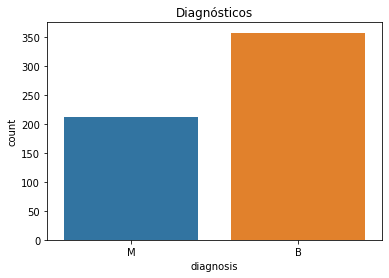

In [14]:
# ver porcentagem dos diagnósticos
print("Diagnósticos:")
print(df.diagnosis.value_counts() / df.shape[0])

# plotar o gráfico de barras com os diagnósticos
fig, ax = plt.subplots()
sns.countplot('diagnosis', data=df, ax=ax)
ax.set_title("Diagnósticos")
plt.show()

##### Para ter a noção de como as variáveis estão distribuídas, vamos plotar o histograma de todas as variáveis numéricas.
##### Preste sempre atenção em como os valores de algumas variáveis estão mais bem distribuídos em torno de uma média e outras tendem a puxar o histograma para a esquerda.

/home/ieb-doc/.conda/envs/py36/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


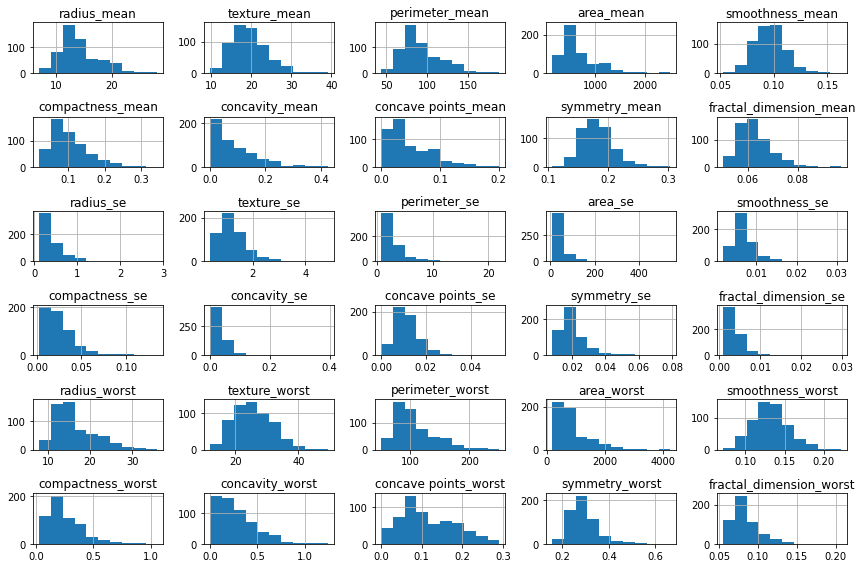

In [17]:
# plotar o histograma das features
fix, ax = plt.subplots(figsize=(12,8))
df.hist(ax=ax)
plt.tight_layout()

##### Para ver a força da correlação entre as variáveis, vamos plotar um *heatmap*. Repare no mapa abaixo como diversas variáveis possuem correlação positiva.

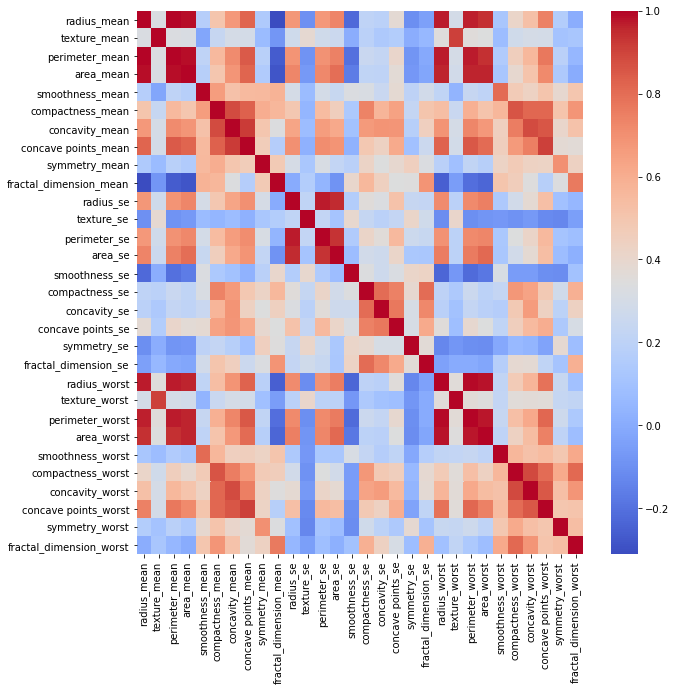

In [18]:
# plotar heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), cmap='coolwarm', ax=ax)
plt.show()

## Preparação dos dados

##### Como parte do pré-processamento dos dados, que irão alimentar o modelo de *Machine Learning*, vamos utilizar o `StardardScaler`, do `sklearn.preprocessing`, para padronizar os dados numéricos.
##### Como a váriavel "alvo" é categórica, onde *M* representa os tumores malignos e *B* os benignos. Desse modo será utilizado o `LabelEncoder` para converter variáveis categóricas em numéricas para que o modelo consigra trabalhar adequadamente.

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# separar as variáveis dependentes e independentes
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

# padronizar as colunas numéricas
X = StandardScaler().fit_transform(X)

# label encoder na variável dependente
y = LabelEncoder().fit_transform(y)

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

##### Vale destacar que o cálculo utilizar por `StandardScaler` para calcular os *scores* é $z = \frac{x-u}{s}$, onde $u$ é a média das amostras do conjunto de treino e $s$ é o desvio padrão dessa amostra.
##### Por fim, antes de construir o modelo, dividimos o *dataset* entre treino e teste usando o `train_test_split`, função que facilitar muito o trabalho, e que se encontra em `sklearn.model_selection`.

## Modelo de Machine Learning para detecção do câncer de mama

##### Este problema de detecção de câncer consiste em classificar corretamente um tumor entre benigno e maligno, ou seja, é necessário que o modelo de *Machine Learning* dê uma classificação ao ser alimentado com diversas variáveis independentes (*features*).
##### Para a resolução desse problema será utilizado um modelo do tipo *Random Forest* (Floresta Aleatória) devido à sua flexibilidade e facilidade de uso (uma vez que funciona muito bem mesmo sem o ajuste nos hiperparâmetros).

In [72]:
from sklearn.ensemble import RandomForestClassifier

# instanciando o modelo de Random Forest
ml_model = RandomForestClassifier(n_estimators = 15, criterion = 'entropy',
                                  random_state = 42)

# treinando o modelo 
ml_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=42)

##### O algoritmo *Random Forest*, que usa métodos *ensemble*, tem esse nome por que cria uma combinação de várias árvores de decisão - uma "floresta" realmente - verificando qual combinação apresenta melhor desempenho e acurácia.

## Desempenho do modelo de detecção de câncer de mama

##### Cada caso é um caso. Nem sempre uma excelente acurácia vai significar que  o modelo está bom. Quando se trata de detectar câncer, queremos maximizar o número de verdadeiros positivos e minimizar o número de falsos negativos, para que não deixemos que pessoas que possuam o cancer sem um aviso para tratamento. No entanto, esta é uma balança difícil de equilibrar, e o *trade-off* pode ser bem subjetivo inclusive.
##### Desse modo, além da métrica de acurácia podemos usar a função `classification_report` para ver ver o desempenho do modelo sobre as métricas de precisão, *recall*, *f1-score* e *support*.

In [73]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# realizar as previsões no dataset de teste
y_pred = ml_model.predict(X_test)

# ver acurácia geral
print('[Acurácia] Random Forest:', accuracy_score(y_test, y_pred))

# imprimir o classification report
print('\n[Classification Report] Random Forest')
print( classification_report(y_test, y_pred) )

[Acurácia] Random Forest: 0.9790209790209791

[Classification Report] Random Forest
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        89
           1       0.98      0.96      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



##### Agora vamos dar uma olhada na matriz de confusão. Há vezes em que é melhor ter mais falsos positivos e investigar mais profundamente o caso, e ter um modelo menos preciso. 

In [74]:
# plotar a matriz de confusão
pd.DataFrame(confusion_matrix(y_test, y_pred),
             index=['neg', 'pos'], columns=['pred_neg', 'pred_pos'])

,pred_neg,pred_pos
neg,88,1
pos,2,52


##### Como podemos confirmar, o modelo classificatório Random Forest foi capaz de atingir uma acurácia superior a 97%, reportoando 2 falsos negativo e 1 falso positivo. 

##### A importância de um dianóstico precoce do câncer de mama deve estar clara na cabeça de todo mundo. Avanços e descobertas no campo da Inteligência Artificial ocorrem a todo momento, principalmente na área da saúde. Deteccção de Câncer por meio de algoritmos de <em>Machine Learning</em> ajudam cada vez mais os médicos a diagnosticarem seus pacientes, aumentando drásticamente as chances dos tratamentos concencionais. No entanto, mesmo a construção de modelos altamente confiáveis para a detecção de câncer de mama não substitui uma variável, a principal <em>feature</em>, o diagnóstico precoce.